In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB

# Load in the data

In [2]:
train_df = pd.read_csv("../data/train.2024.04.16.csv")
test_df = pd.read_csv("../data/test.2024.04.16.csv")

# Keith Features

In [3]:
 # Five selected features
feature_col_names = ['F01', 'F04', 'F06', 'F09','F13']

In [4]:
train_all_feats_df = train_df[~np.any(np.isnan(train_df[feature_col_names]), axis=1)]
test_feats_df = test_df[~np.any(np.isnan(test_df[feature_col_names]), axis=1)]

In [5]:
# Get all training examples that have values for the selected features

X_train = train_all_feats_df[feature_col_names].to_numpy()
y_train = train_all_feats_df["y"].to_numpy()

In [6]:
np.any(np.isnan(X_train))

False

In [7]:
# Get all testing examples that have values for the selected features
X_test = test_feats_df[feature_col_names].to_numpy()
y_test = test_feats_df["y"].to_numpy()

In [8]:
# Get all testing examples that have values for all 13 features
feature_col_all = ['F01', 'F02', 'F03', 'F04',
       'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12', 'F13']
test_all_feats_df = test_df[~np.any(np.isnan(test_df[feature_col_all]), axis=1)]
X_test_all = test_all_feats_df[feature_col_names].to_numpy()
y_test_all = test_all_feats_df["y"].to_numpy()

In [9]:
"""Drop examples where any feature is < lb or > ub
"""
def drop_inds(X, y, lb, ub):
    drop_inds = np.unique(np.concatenate([np.unique(np.where(X < lb)[0]), 
                                        np.unique(np.where(X > ub)[0])]))
    print(drop_inds)
    keep_inds = np.sort(np.delete(np.arange(0, X.shape[0]), drop_inds))
    X = X[keep_inds, :]
    y = y[keep_inds]

    return X, y, keep_inds

In [13]:
X_train_original = X_train
y_train_original = y_train

X_test_original = X_test
y_test_original = y_test

In [12]:
np.unique(y_train_original, return_counts=True)[1]

array([249, 959, 156])

In [14]:
np.unique(y_test_original, return_counts=True)[1]

array([ 55, 233,  40])

In [10]:
# Remove examples with values beyond the outer fence of the training features
print(X_train.shape, X_test.shape, X_test_all.shape)
q1, q3  = np.percentile(X_train, [25, 75], axis=0)
IQR = q3 - q1
lower_fence = q1 - IQR*3.0
upper_fence = q3 + IQR*3.0
X_train, y_train, keep_inds1 = drop_inds(X_train, y_train, lower_fence, upper_fence)
X_test, y_test, keep_inds2 = drop_inds(X_test, y_test, lower_fence, upper_fence)
X_test_all, y_test_all, keep_inds3 = drop_inds(X_test_all, y_test_all, lower_fence, upper_fence)
print(X_train.shape, X_test.shape, X_test_all.shape)

(1364, 5) (328, 5) (207, 5)
[158 794 880 920]
[107]
[63]
(1360, 5) (327, 5) (206, 5)


In [11]:
print('Training:', X_train.shape, y_train.shape)
print('Testing:', X_test.shape, y_test.shape)
print('Training class percentage:', np.unique(y_train, return_counts=True)[1]/len(y_train))
print('Testing class percentage:', np.unique(y_test, return_counts=True)[1]/len(y_test))
print('Testing all feats class percentage:', np.unique(y_test_all, return_counts=True)[1]/len(y_test_all))

Training: (1360, 5) (1360,)
Testing: (327, 5) (327,)
Training class percentage: [0.18161765 0.70367647 0.11470588]
Testing class percentage: [0.16819572 0.70948012 0.12232416]
Testing all feats class percentage: [0.16990291 0.69417476 0.13592233]


In [12]:
np.unique(y_train, return_counts=True)[1]

array([247, 957, 156])

In [13]:
np.unique(y_test, return_counts=True)[1]

array([ 55, 232,  40])

In [14]:
# Scale features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_all_scaled = scaler.transform(X_test_all)

# LDA

In [15]:
# Train the model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
y_train_pred_lda = lda.predict(X_train_scaled)

## LDA Training Results

In [16]:
cm = confusion_matrix(y_train, y_train_pred_lda)
print(cm)

[[205  16  26]
 [ 14 943   0]
 [ 13   0 143]]


In [17]:
f1_score(y_train, y_train_pred_lda, average='macro')

0.9067640918580375

## LDA Testing Results with 5 features

In [18]:
X_test_scaled.shape

(327, 5)

In [19]:
45 + 3 + 5 + 1 + 233 + 2 + 34

323

In [20]:
y_test_pred_lda = lda.predict(X_test_scaled)

In [21]:
cm_lda_test = confusion_matrix(y_test, y_test_pred_lda)
print(cm_lda_test)

[[ 49   2   4]
 [  3 229   0]
 [  5   0  35]]


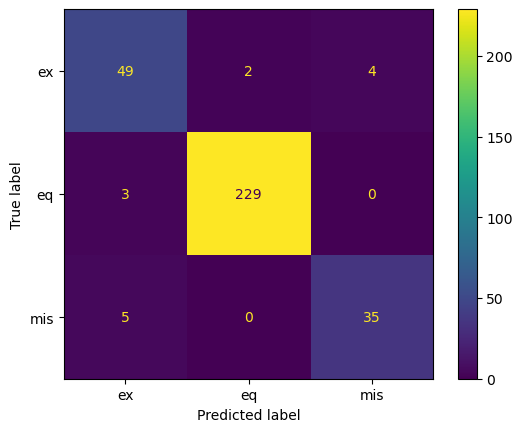

In [22]:
display = ConfusionMatrixDisplay(confusion_matrix=cm_lda_test, 
                       display_labels=['ex', 'eq', 'mis'])
display.plot()

In [23]:
f1_score(y_test, y_test_pred_lda, average='macro')

0.9167589377659914

In [24]:
f1_score(y_test, y_test_pred_lda, labels=[0], average="macro")

0.875

In [25]:
f1_score(y_test, y_test_pred_lda, labels=[1], average="macro")

0.9892008639308856

In [26]:
f1_score(y_test, y_test_pred_lda, labels=[2], average="macro")

0.8860759493670886

In [27]:
lda_test_misclassified = test_feats_df.iloc[keep_inds2][y_test != y_test_pred_lda]
lda_test_misclassified["prediction"] = y_test_pred_lda[y_test != y_test_pred_lda]
lda_test_misclassified.to_csv("ldaTestMisclassifiedKeith.csv", index=False)
lda_test_misclassified

,Unnamed: 0,Date,Time,Elat,Elon,Dep,Tag,F01,F02,F03,...,F06,F07,F08,F09,F10,F11,F12,F13,y,prediction
42,2518,2017-08-03,19:59:30.27,40.507,-112.165,-2.0,ex,-0.13,0.49,0.24,...,12.82,12.77,0.19,0.11,0.14,0.23,0.48,0.63,0,2
126,1584,2015-08-26,17:47:44.53,39.557,-112.200,-2.0,ex,-0.12,-0.10,0.05,...,15.25,12.90,0.09,-0.02,0.23,0.19,-0.01,0.16,0,1
149,3699,2019-12-17,07:13:46.30,39.413,-110.306,-1.8,mis,-0.23,0.04,0.05,...,13.31,12.86,-0.15,-0.17,-0.30,-0.20,NaN,0.35,2,0
248,8922,2022-08-10,03:33:08.52,39.427,-110.305,-1.4,mis,-0.29,0.38,0.33,...,14.23,12.98,0.02,0.19,0.10,0.05,0.19,0.33,2,0
472,1128,2014-09-12,19:45:14.79,40.030,-111.739,2.7,eq,-0.13,0.56,0.51,...,14.63,14.62,NaN,0.08,0.01,-0.01,NaN,0.14,1,0
557,822,2014-03-16,21:46:12.02,40.517,-112.162,-2.0,ex,-0.09,1.20,0.07,...,12.70,13.19,NaN,0.55,NaN,NaN,NaN,0.33,0,2
656,2062,2016-09-11,20:52:48.00,40.509,-112.169,-2.0,ex,-0.23,0.15,0.02,...,13.67,12.74,0.15,0.19,0.31,0.24,0.38,0.53,0,2
673,8929,2022-08-10,20:31:24.12,39.430,-110.299,-2.2,mis,-0.25,-0.17,-0.05,...,13.79,13.10,0.07,0.10,0.06,0.19,0.32,0.47,2,0
750,3833,2020-03-18,14:01:04.19,40.726,-112.096,10.0,eq,-0.73,0.63,-0.12,...,14.46,15.35,0.11,-0.12,-0.12,-0.24,NaN,-0.10,1,0
785,5882,2020-04-29,03:43:41.52,40.711,-112.072,10.0,eq,0.18,0.93,0.60,...,14.16,14.80,NaN,0.01,0.01,0.07,NaN,0.13,1,0


# LDA testing results with 13 features

F1-score when training with all 13 features: 0.91  
F1-score when training with Keith's 5 features: 0.93

In [28]:
y_test_all_pred_lda = lda.predict(X_test_all_scaled)
cm = confusion_matrix(y_test_all, y_test_all_pred_lda)
print(cm)

[[ 30   2   3]
 [  0 143   0]
 [  2   0  26]]


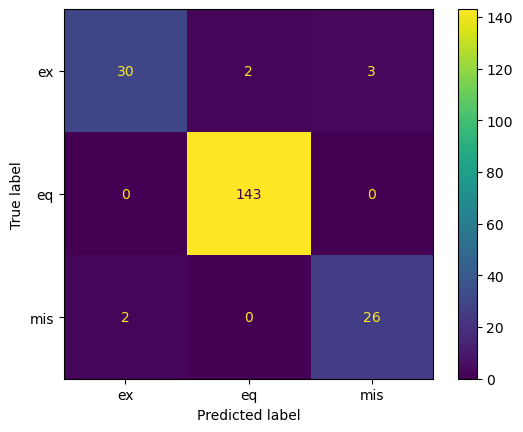

In [29]:
display = ConfusionMatrixDisplay(confusion_matrix=cm, 
                       display_labels=['ex', 'eq', 'mis'])
display.plot()

In [30]:
f1_score(y_test_all, y_test_all_pred_lda, average='macro')

0.9336195484565476

# Naive Bayes

## NB Training Results

In [31]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_train_pred_nb = nb.predict(X_train_scaled)

In [32]:
cm = confusion_matrix(y_train, y_train_pred_nb)
print(cm)

[[222   4  21]
 [ 25 932   0]
 [ 13   0 143]]


In [33]:
f1_score(y_train, y_train_pred_nb, average='macro')

0.9180566821498491

## NB testing results with 5 features

In [34]:
y_test_pred_nb = nb.predict(X_test_scaled)
cm_nb_test = confusion_matrix(y_test, y_test_pred_nb)
print(cm_nb_test)

[[ 52   2   1]
 [  7 225   0]
 [  6   0  34]]


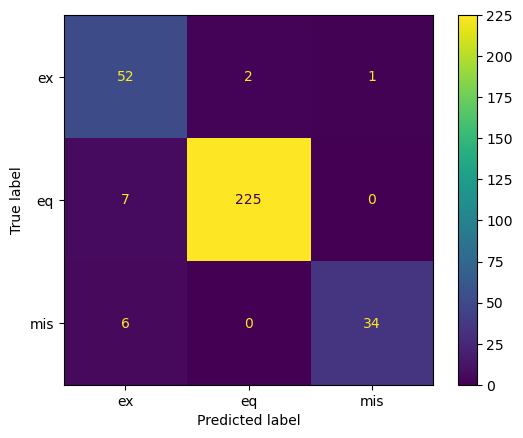

In [35]:
display = ConfusionMatrixDisplay(confusion_matrix=cm_nb_test, 
                       display_labels=['ex', 'eq', 'mis'])
display.plot()

In [36]:
f1_score(y_test, y_test_pred_nb, average='macro')

0.9179084967320262

In [37]:
f1_score(y_test, y_test_pred_nb, average='macro', labels=[0])

0.8666666666666667

In [38]:
f1_score(y_test, y_test_pred_nb, average='macro', labels=[1])

0.9803921568627451

In [39]:
f1_score(y_test, y_test_pred_nb, average='macro', labels=[2])

0.9066666666666666

In [40]:
nb_test_misclassified = test_feats_df.iloc[keep_inds2][y_test != y_test_pred_nb]

In [41]:
y_test_pred_nb[y_test != y_test_pred_nb]

array([1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [42]:
nb_test_misclassified["predicted"] = y_test_pred_nb[y_test != y_test_pred_nb]
nb_test_misclassified
nb_test_misclassified.to_csv("nbTestMisclassifiedKeith.csv", index=False)

## NB testing results w/ 13 features

F1-score when training with all 13 features: 0.93  
F1-score when training with Keith's 5 features features: 0.94

In [43]:
y_test_all_pred_nb = nb.predict(X_test_all_scaled)
cm = confusion_matrix(y_test_all, y_test_all_pred_nb)
print(cm)

[[ 32   2   1]
 [  1 142   0]
 [  3   0  25]]


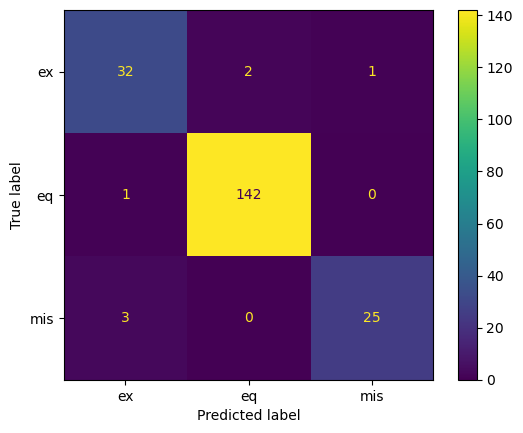

In [44]:
display = ConfusionMatrixDisplay(confusion_matrix=cm, 
                       display_labels=['ex', 'eq', 'mis'])
display.plot()

In [45]:
f1_score(y_test_all, y_test_all_pred_nb, average='macro')

0.9389604716525591

In [46]:
f1_score(y_test_all, y_test_all_pred_nb, average='macro', labels=[0])

0.9014084507042254

In [47]:
f1_score(y_test_all, y_test_all_pred_nb, average='macro', labels=[1])

0.9895470383275261

In [48]:
f1_score(y_test_all, y_test_all_pred_nb, average='macro', labels=[2])

0.9259259259259259

In [49]:
test_all_feats_df.iloc[keep_inds3][y_test_all != y_test_all_pred_nb]

,Unnamed: 0,Date,Time,Elat,Elon,Dep,Tag,F01,F02,F03,...,F05,F06,F07,F08,F09,F10,F11,F12,F13,y
126,1584,2015-08-26,17:47:44.53,39.557,-112.200,-2.0,ex,-0.12,-0.10,0.05,...,-95.7,15.25,12.90,0.09,-0.02,0.23,0.19,-0.01,0.16,0
547,7470,2021-09-02,05:43:22.92,39.430,-110.300,-2.0,mis,-0.21,0.19,0.17,...,-111.0,15.31,12.64,0.00,0.31,0.21,-0.01,0.55,0.65,2
656,2062,2016-09-11,20:52:48.00,40.509,-112.169,-2.0,ex,-0.23,0.15,0.02,...,-127.0,13.67,12.74,0.15,0.19,0.31,0.24,0.38,0.53,0
673,8929,2022-08-10,20:31:24.12,39.430,-110.299,-2.2,mis,-0.25,-0.17,-0.05,...,-119.4,13.79,13.10,0.07,0.10,0.06,0.19,0.32,0.47,2
907,2738,2018-01-18,17:12:25.43,40.614,-109.514,-2.0,ex,-0.31,-0.22,-0.38,...,-120.6,14.93,14.15,0.08,0.08,0.17,0.10,0.16,0.07,0
1086,3201,2019-02-16,06:41:40.57,40.471,-111.934,4.6,eq,0.12,1.04,0.69,...,-127.7,14.33,14.74,-0.12,-0.03,-0.01,0.07,-0.06,0.07,1
1650,2959,2018-08-18,18:18:26.54,38.982,-111.365,-1.9,mis,-0.54,0.20,-0.06,...,-135.6,12.66,12.70,0.07,0.07,0.01,-0.17,0.25,0.06,2


# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

In [51]:
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=36851234)
model = RandomForestClassifier(random_state=0)
params = {"n_estimators": [50, 100, 500, 100], "min_samples_leaf":[1, 2, 5, 10], "max_depth":[5, 10]}
gs = GridSearchCV(model, params, scoring="f1_macro", cv=rskf, n_jobs=5)
gs.fit(X_train, y_train)
model = gs.best_estimator_
gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 50}

In [52]:
# params = {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}
# model = RandomForestClassifier(random_state=0, **params)
# model.fit(X_train, y_train)

In [53]:
y_train_preds_rf = model.predict(X_train)
f1_score(y_train, y_train_preds_rf, average="macro")

0.9466975710950432

In [54]:
y_test_preds_rf = model.predict(X_test)
f1_score(y_test, y_test_preds_rf, average="macro")

0.9194237340789065

In [55]:
f1_score(y_test, y_test_preds_rf, average="macro", labels=[0])

0.8793103448275862

In [56]:
f1_score(y_test, y_test_preds_rf, average="macro", labels=[1])

0.9870689655172413

In [57]:
f1_score(y_test, y_test_preds_rf, average="macro", labels=[2])

0.8918918918918919

In [58]:
cm_test_rf = confusion_matrix(y_test, y_test_preds_rf)
print(cm_test_rf)

[[ 51   3   1]
 [  3 229   0]
 [  7   0  33]]


In [59]:
rf_test_misclassified = test_feats_df.iloc[keep_inds2][y_test != y_test_preds_rf]
rf_test_misclassified["prediction"] = y_test_preds_rf[y_test != y_test_preds_rf]
rf_test_misclassified.to_csv("rfTestMisclassifiedKeith.csv", index=False)
rf_test_misclassified

,Unnamed: 0,Date,Time,Elat,Elon,Dep,Tag,F01,F02,F03,...,F06,F07,F08,F09,F10,F11,F12,F13,y,prediction
126,1584,2015-08-26,17:47:44.53,39.557,-112.200,-2.0,ex,-0.12,-0.10,0.05,...,15.25,12.90,0.09,-0.02,0.23,0.19,-0.01,0.16,0,1
149,3699,2019-12-17,07:13:46.30,39.413,-110.306,-1.8,mis,-0.23,0.04,0.05,...,13.31,12.86,-0.15,-0.17,-0.30,-0.20,NaN,0.35,2,0
329,7151,2021-06-21,01:41:37.74,37.592,-113.313,8.6,eq,0.03,0.74,0.46,...,13.77,14.86,NaN,-0.23,-0.23,-0.31,NaN,-0.28,1,0
365,1889,2016-05-05,22:23:14.54,40.623,-109.507,-2.0,ex,-0.12,-0.37,-0.47,...,15.24,14.64,0.13,0.14,0.14,0.10,0.14,0.16,0,1
370,7500,2021-09-08,00:36:37.12,39.433,-110.317,-1.6,mis,-0.67,-0.33,-0.44,...,13.43,13.33,0.05,0.08,0.03,-0.06,0.23,0.16,2,0
472,1128,2014-09-12,19:45:14.79,40.030,-111.739,2.7,eq,-0.13,0.56,0.51,...,14.63,14.62,NaN,0.08,0.01,-0.01,NaN,0.14,1,0
527,836,2014-03-23,06:03:51.77,40.562,-111.263,13.3,eq,-0.17,0.89,0.57,...,13.82,13.75,NaN,0.08,0.08,0.09,NaN,0.07,1,0
547,7470,2021-09-02,05:43:22.92,39.430,-110.300,-2.0,mis,-0.21,0.19,0.17,...,15.31,12.64,0.00,0.31,0.21,-0.01,0.55,0.65,2,0
645,8832,2022-07-29,07:08:19.74,39.428,-110.303,-1.7,mis,-0.20,0.22,0.37,...,13.38,12.48,0.00,0.32,0.10,NaN,NaN,0.66,2,0
656,2062,2016-09-11,20:52:48.00,40.509,-112.169,-2.0,ex,-0.23,0.15,0.02,...,13.67,12.74,0.15,0.19,0.31,0.24,0.38,0.53,0,2


# Combine confusion matrices

In [60]:
cm_nb_test

array([[ 52,   2,   1],
       [  7, 225,   0],
       [  6,   0,  34]])

In [61]:
import matplotlib.pyplot as plt

In [62]:
SMALL_SIZE = 9
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rc('figure', labelsize=MEDIUM_SIZE)

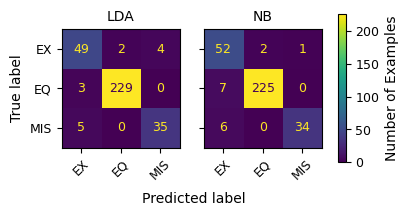

In [63]:
fig, axes = plt.subplots(1, 2, sharey='row', figsize=(4.2, 4.8))
i = 0
for key, cm, ax in zip(["LDA", "NB"], [cm_lda_test, cm_nb_test], axes):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                        display_labels=['EX', 'EQ', 'MIS'])
    disp.plot(ax=ax, xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')
    i+=1
fig.colorbar(disp.im_, ax=axes, shrink=0.4, label="Number of Examples")
fig.supxlabel('Predicted label', y=0.25, x=0.44)
plt.show()

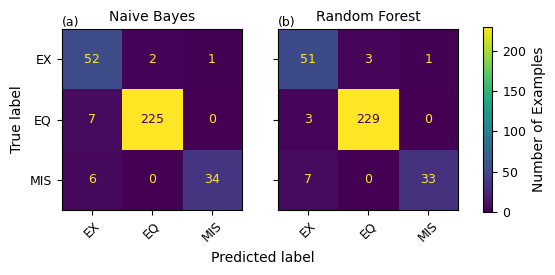

In [64]:
fig, axes = plt.subplots(1, 2, sharey='row', figsize=(6.4, 3))#, figsize=(4.2, 2.5))
i = 0
labels = ["(a)", "(b)"]

for key, cm, ax in zip(["Naive Bayes", "Random Forest"], [cm_nb_test, cm_test_rf], axes):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                        display_labels=['EX', 'EQ', 'MIS'])
    disp.plot(ax=ax, xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    disp.ax_.text(0.0, 1.02, labels[i], transform=ax.transAxes)
    if i!=0:
        disp.ax_.set_ylabel('')
    i+=1
fig.colorbar(disp.im_, ax=axes, shrink=0.8, label="Number of Examples")
fig.supxlabel('Predicted label', y=0.01, x=0.44)
plt.show()
fig.savefig("nb_rf_cm_keith.png", dpi=300)

In [65]:
fig.get_size_inches()

array([6.4, 3. ])

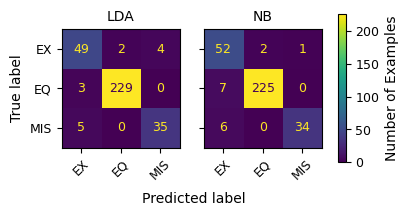

In [66]:
fig, axes = plt.subplots(1, 2, sharey='row', figsize=(4.2, 4.8))
i = 0
for key, cm, ax in zip(["LDA", "NB"], [cm_lda_test, cm_nb_test], axes):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                        display_labels=['EX', 'EQ', 'MIS'])
    disp.plot(ax=ax, xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')
    i+=1
fig.colorbar(disp.im_, ax=axes, shrink=0.4, label="Number of Examples")
fig.supxlabel('Predicted label', y=0.25, x=0.44)
plt.show()

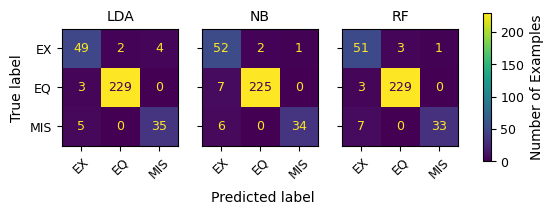

In [67]:
fig, axes = plt.subplots(1, 3, sharey='row')
i = 0
for key, cm, ax in zip(["LDA", "NB", "RF"], [cm_lda_test, cm_nb_test, cm_test_rf], axes):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                        display_labels=['EX', 'EQ', 'MIS'])
    disp.plot(ax=ax, xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')
    i+=1
fig.colorbar(disp.im_, ax=axes, shrink=0.4, label="Number of Examples")
fig.supxlabel('Predicted label', y=0.25, x=0.44)
plt.show()

# Tibi

In [68]:
ex_ex = 24
ex_mis = 2
ex_eq = 1
mis_ex = 3
mis_mis = 187
mis_eq = 29
eq_ex = 8
eq_mis = 16
eq_eq = 100

In [69]:
cm = [[ex_ex, ex_eq, ex_mis],
      [eq_ex, eq_eq, eq_mis],
      [mis_ex, mis_eq, mis_mis]]
print(cm)

[[24, 1, 2], [8, 100, 16], [3, 29, 187]]


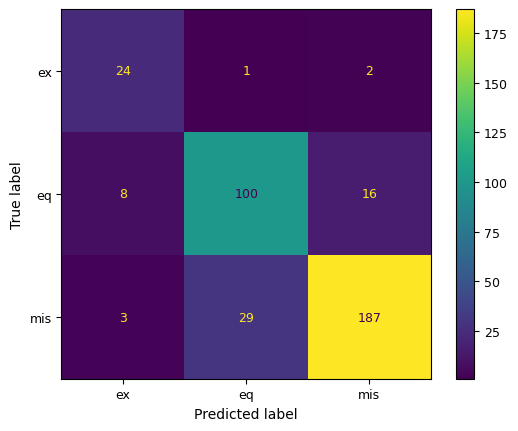

In [70]:
display = ConfusionMatrixDisplay(confusion_matrix=np.array(cm), 
                       display_labels=['ex', 'eq', 'mis'])
display.plot()

In [71]:
def f1(tp, fn, fp):
    return (2*tp)/(2*tp+fp+fn)

In [72]:
def all_f1(cm):
    ex_fn = cm[0][1] + cm[0][2]
    ex_fp = cm[1][0] + cm[2][0]
    ex_tp = cm[0][0]
    print(ex_tp, ex_fn, ex_fp)
    ex_f1 = f1(ex_tp, ex_fn, ex_fp)
    print(ex_f1)

    eq_fn = cm[1][0] + cm[1][2]
    eq_fp = cm[0][1] + cm[2][1]
    eq_tp = cm[1][1]
    print(eq_tp, eq_fn, eq_fp)
    eq_f1 = f1(eq_tp, eq_fn, eq_fp)
    print(eq_f1)

    mis_fn = cm[2][0] + cm[2][1]
    mis_fp = cm[0][2] + cm[1][2]
    mis_tp = cm[2][2]
    print(mis_tp, mis_fn, mis_fp)
    mis_f1 = f1(mis_tp, mis_fn, mis_fp)
    print(mis_f1)

    macro = (ex_f1 + eq_f1 + mis_f1)/3

    return ex_f1, eq_f1, mis_f1, macro

In [73]:
all_f1(cm)

24 3 11
0.7741935483870968
100 24 30
0.7874015748031497
187 32 18
0.8820754716981132


(0.7741935483870968,
 0.7874015748031497,
 0.8820754716981132,
 0.8145568649627867)

In [74]:
ex_ex = 45
ex_mis = 3
ex_eq = 0
mis_ex = 1
mis_mis = 6280
mis_eq = 5
eq_ex = 7
eq_mis = 37
eq_eq = 972

cm = [[ex_ex, ex_eq, ex_mis],
      [eq_ex, eq_eq, eq_mis],
      [mis_ex, mis_eq, mis_mis]]
print(cm)

[[45, 0, 3], [7, 972, 37], [1, 5, 6280]]


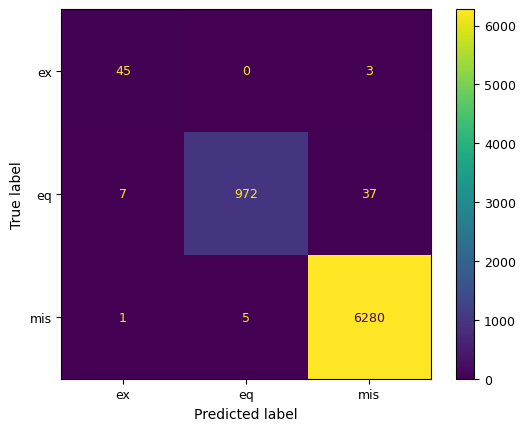

In [75]:
display = ConfusionMatrixDisplay(confusion_matrix=np.array(cm), 
                       display_labels=['ex', 'eq', 'mis'])
display.plot()

In [76]:
all_f1(cm)

45 3 8
0.8910891089108911
972 44 5
0.9754139488208731
6280 6 40
0.9963509439949231


(0.8910891089108911, 0.9754139488208731, 0.9963509439949231, 0.954284667242229)